<a href="https://colab.research.google.com/github/Razbolt/Neural-Network/blob/main/Neural_Network_Math_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Install the MNIST and requirements

In [261]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

In [262]:
pip install python-mnist -- quiet

  Using cached python_mnist-0.7-py2.py3-none-any.whl (9.6 kB)
ERROR: Could not find a version that satisfies the requirement quiet (from versions: none)
ERROR: No matching distribution found for quiet
Note: you may need to restart the kernel to use updated packages.


In [263]:
from keras.datasets import mnist

# Using keras libraries to take MNIST dataset
(X_train, y_train,), (X_test, y_test) = mnist.load_data()

## 1.1 Data preparation

Before procesing, we need to check the MNIST Data.

As we can see the X_train data is numbered from 0 to 255. In order to use them we need to normalize them as dividing to 255 each of the value.

In [264]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

We also need to check the shapes before feeding them into model.

In [265]:
X_train.shape

(60000, 28, 28)

In [266]:
X_test.shape

(10000, 28, 28)

In [267]:
X_train[1].shape

(28, 28)

In [268]:
# Since we see the shapes are (6000,28,28) we need to reshape them to feed our model

X_train = X_train.reshape(60000, 784) / 255.0

X_test = X_test.reshape(10000, 784) /255.0

print(X_train.shape , X_test.shape)

(60000, 784) (10000, 784)


In [269]:
print(X_train[0].shape)

(784,)


# 2.1 Build Neural Network

In [270]:
def init_params():

  #input layer's weigths
  W1 = np.random.uniform(-0.5, 0.5, (16,784))
  b1 = np.zeros((16,1))




  #Hidden layer's weight
  W2 = np.random.uniform(-0.5,0.5, (16,16))
  b2 = np.zeros((16,1))


  # Second Hidden layer' weight
  W3 = np.random.uniform(-0.5,0.5 ,(10,16))  # Weights are still to big
  b3 = np.zeros((10,1))


  return W1,b1,W2,b2,W3,b3



W1,b1,W2,b2,W3,b3 = init_params()


## 2.2 Build Activation functions and Forward Propagation

In [271]:
def ReLU(Z):

  return np.maximum(0,Z)


def softmax(Z): # CHECK IT !!!

  # for one examples is (np.exp(Z) / np.sum( np.exp(Z)))

    Z_exp = np.exp(Z - np.max(Z, axis=0))
    sum_Z_exp = np.sum(Z_exp, axis=0)
    softmax_output = Z_exp / sum_Z_exp

    return softmax_output

def sigmoid(Z):

  return 1 / 1+ np.exp(-Z)





def forward_prop(X,W1,b1,W2,b2,W3,b3,dropout = 0.0):
  #We are assuming to have 3 layered neural network 
  #D1 and D2 are mask layers for dropout 

  D1= None
  D2=None

  # if there is no dropout layer
  if (dropout) == 0.0:
    #Forward propagation with 3 layered neural network

    #Initialize  Z
    #Since X is shape as (6000,784) and our W1 is shape as (16,784) in order to dot product we need to take Transpose of X

    Z1 = W1.dot(X.T)+ b1
    #Activation with ReLU to given linear regression to feed neural network
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2


    A2 = ReLU(Z2)

    Z3 = W3.dot(A2) + b3
    #At the end softmax  the output layer to have a probabilistic values
    A3 = softmax(Z3)

 

  else: # If there is a droput layer, we are going to build mask for each layer
    #Forward propagation with 3 layered neural network 

    Z1 = W1.dot(X.T)+ b1
    #Activation with ReLU to given linear regression to feed neural network
    A1 = ReLU(Z1)
    
    #Create a mask for A1 as use probability of dropout from user
    D1 = np.random.rand(*A1.shape) > dropout #D1 is mask matrix that check the proability of dropout.
                                                          #If the probability is bigger than dropout, it will be 1 otherwise 0

    #Apply mask to A1
    A1 = A1 * D1
    #Normalize A1 to not to change expected value of A1 
    A1 = A1 / (1-dropout) # It scales A to not to change expected value of A1 as keeping  probability 
                          #keeeping probability means 1 - dropout probability

   
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    
    #Create a mask for second hidden layer as use probability of dropout from user
    D2 = np.random.rand( *A2.shape) > dropout
    A2 = A2 * D2
    A2 = A2 / (1-dropout)

    Z3 = W3.dot(A2) + b3
    #At the end softmax  the output layer to have a probabilistic values
    A3 = softmax(Z3)

  return A1,A2,A3,D1,D2

A1,A2,A3,D1,D2 = forward_prop(X_train,W1,b1,W2,b2,W3,b3)

print(A3)






[[6.41960727e-01 4.80027115e-01 9.56112736e-02 ... 6.82384221e-01
  1.06750800e-01 3.04745742e-01]
 [5.63421214e-03 1.41075820e-02 8.44762629e-03 ... 1.91900261e-02
  9.07050061e-02 6.84230633e-02]
 [3.07662586e-02 4.03501530e-02 4.54566091e-03 ... 1.33849066e-02
  3.29055454e-02 3.94658431e-02]
 ...
 [5.27785458e-02 6.74184718e-02 7.96634901e-02 ... 7.10390130e-02
  1.53916734e-01 2.06023303e-01]
 [1.20331809e-03 4.96238717e-03 6.65052892e-04 ... 1.16454313e-03
  1.19487670e-02 1.66413106e-02]
 [3.16314756e-02 3.03949182e-02 7.81894712e-01 ... 1.00958646e-01
  4.74589942e-01 1.57109805e-01]]


In [272]:
print(A1.shape[1])

60000


## 2.3 Back-Propagation with One-hot and derivative of activaton functions

In [273]:
def one_hot(Y): # CHECK IT !!
  num_classes = np.max(Y) + 1

  one_hot = np.zeros((Y.size,num_classes))
  one_hot[np.arange(Y.size), Y] = 1

  return one_hot.T

def derivative_ReLU(Z):
  #Do we need to check between 0-1 ?
  return Z > 0

#Focus on backpropagation !!! Check how its works ! 
def backward_prop(X, Y, W1, b1, W2, b2, W3, b3, A1, A2, A3,D1, D2, dropout = 0.0): # CHECK IT !!!!

  m = Y.size
  Y = one_hot(Y)
  #if droput is not used

  if (dropout) == 0.0:
    
    #One hot encoded to see each labels in matrix as 1
    

    #Derivate of cost function with respect to z3
    dZ3 = A3 - Y
    dW3 = (1/m) * dZ3.dot(A2.T)
    dB3 = (1/m) * np.sum(dZ3,axis = 1,keepdims=True)

    #Derivate for second hidden layer
    dA2 = np.dot(W3.T,dZ3)
    dZ2 =  dA2  * derivative_ReLU(A2)
    dW2 = (1/ m) * dZ2.dot(A1.T)
    dB2 = (1/m) * np.sum(dZ2,axis =1,keepdims=True)

    #Derivate for first hidden layer

    dA1 = np.dot(W2.T,dZ2)
    dZ1 = dA1 * derivative_ReLU(A1)
    dW1 = (1/m) * dZ1.dot(X)
    dB1 =(1/m) * np.sum(dZ1, axis = 1,keepdims=True)

  else: #If droput is used

    #Derivate of cost function with respect to z3
    dZ3 = A3 - Y
    dW3 = (1/m) * dZ3.dot(A2.T)
    dB3 = (1/m) * np.sum(dZ3,axis = 1,keepdims=True)

    #Derivate for second hidden layer
    dA2 = np.dot(W3.T,dZ3)
    #Dropout mask for second hidden layer
    dA2 = dA2 * (D2)
    #dA2 = D2 / dropout

    dZ2 =  dA2  * derivative_ReLU(A2)
    dW2 = (1/ m) * dZ2.dot(A1.T)
    dB2 = (1/m) * np.sum(dZ2,axis =1,keepdims=True)

    #Derivate for first hidden layer

    dA1 = np.dot(W2.T,dZ2)
    #Dropout mask for first hidden layer
    dA1 = dA1 * (D1)
    #dA1 = D1 / dropout

    dZ1 = dA1 * derivative_ReLU(A1)
    dW1 = (1/m) * dZ1.dot(X)
    dB1 =(1/m) * np.sum(dZ1, axis = 1,keepdims=True)
    

  return dW1,dB1,dW2,dB2,dW3,dB3

## 2.4 Update the Gradient

In [274]:
learning_rate = 0.1
epochs =  200

def update_gradient(dW1,db1,dW2,db2,dW3,db3,W1,b1,W2,b2,W3,b3,learning_rate):

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1,b1,W2,b2,W3,b3


## 2.5 Try in given epochs time to see the changes

In [275]:
def accuracy_score(A,Y):
    size = Y.size
    predict = np.argmax(A,0)

    correct = np.sum(predict == Y)

    accuracy = correct / size

    return accuracy


#print(predictions.max)
#print(y_train)
#print(np.sum(y_train == predictions))
#print(y_train.size)


In [276]:
dropout = 0.1
for epoch in range(epochs):
   # Forward propagation
   A1, A2, A3,D1,D2 = forward_prop(X_train, W1, b1, W2, b2, W3, b3,dropout=dropout)

   #Backward propagation
   dW1, db1, dW2, db2, dW3, db3 = backward_prop(X_train, y_train, W1, b1, W2, b2, W3, b3, A1, A2, A3,D1,D2,dropout=dropout)

   #Updating gradients
   W1,b1,W2,b2,W3,b3 = update_gradient(dW1,db1,dW2,db2,dW3,db3,W1,b1,W2,b2,W3,b3,learning_rate)



   if epoch % 100 == 0:
    acc =accuracy_score(A3,y_train)
    print(f'The accuracy in epoch {epoch} is {acc}')


The accuracy in epoch 0 is 0.08183333333333333
The accuracy in epoch 100 is 0.4684833333333333


# Full Connected Class Version 

  Missing parts

Only update rule

Find refferences for this code, maybe one hot, and test 


In [277]:
import numpy as np

class MyNeuralNetwork:
    def __init__(self,input_size,hidden_sizes,output_size,activation_function,dropout):
        self.layer_sizes = [input_size] + hidden_sizes + [output_size] # Number of neurons in each layer
        self.activation_function = activation_function                 # Activation function to use
        self.dropout = dropout                                         # Dropout probability
        self.weights = []                                              # Weights for each layer
        self.biases = []                                               # Biases for each layer
        self.input_size = input_size                                   # Input size
        self.output_size = output_size                                 # Output size              
        self.hidden_sizes = hidden_sizes                               # Hidden layer sizes


        for i in range(len(self.layer_sizes) - 1):
            self.weights.append(np.random.uniform(-0.5, 0.5, (self.layer_sizes[i+1], self.layer_sizes[i])))
            self.biases.append(np.zeros((self.layer_sizes[i+1], 1)))

            #Debug: Print shapes
            print(f"Weights in layer : {i}, Weights shape: {self.weights[i].shape}, Biases shape: {self.biases[i].shape}")
    
    #Staticmethod is used to call the function without creating an object
    #In this way we can call them in the activation function and deactivation function
    @staticmethod  
    def ReLU(Z):
        return np.maximum(0,Z)
    
    @staticmethod
    def derivative_ReLU(Z):
        return Z > 0
    
    @staticmethod
    def sigmoid(Z):
        # Cap the values of Z within the range [-700, 700], to prevent overflow
        Z = np.clip(Z, -700, 700)
        return 1 / (1 + np.exp(-Z))
    
    @staticmethod
    def derivative_sigmoid(Z):
        return MyNeuralNetwork.sigmoid(Z) * (1 - MyNeuralNetwork.sigmoid(Z))
    
    @staticmethod
    def softmax(Z):
        Z_exp = np.exp(Z - np.max(Z, axis=0))
        sum_Z_exp = np.sum(Z_exp, axis=0)
        softmax_output = Z_exp / sum_Z_exp
        return softmax_output
    

    
    def one_hot(self,Y):
        num_classes = self.output_size
        one_hot = np.zeros((Y.size,num_classes))
        one_hot[np.arange(Y.size), Y] = 1
        return one_hot.T
    
    
    def activation(self,Z):
        if self.activation_function == 'relu':
            return self.ReLU(Z)
        elif self.activation_function == 'sigmoid':
            return self.sigmoid(Z)
        elif self.activation_function == 'softmax':
            return self.softmax(Z)
        else:
            raise Exception('Activation function not supported')
        
    def derivative_activation(self,A):
        if self.activation_function == 'relu':
            return self.derivative_ReLU(A)
        elif self.activation_function == 'sigmoid':
            return self.derivative_sigmoid(A)
        else:
            raise Exception('Activation function not supported')
        
    def calculate_loss(self,A3,Y):
        # Calculate the loss using the cross-entropy loss function
        #Calcuation should be based on y_pred and y_true

        y_pred = A3
        y_true = self.one_hot(Y)

        #Clip the y_prediction between epsilon and 1 - epsilon to prevent log(0) error
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

        #Calculate the loss as multi-class cross-entropy loss
        loss = - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
        loss = np.sum(loss) / Y.size

        return loss
    
    
    def forward_prop(self,X):
        # Forward propagation
        A = X.T
        layer_outputs = {}
        D = {} # Dropout mask matrices

        #Loop over each layer in the network
        for layer in range(len(self.layer_sizes)-1):
            # Compute the linear output Z for the current layer
            Z = self.weights[layer].dot(A) + self.biases[layer]

            #Check for the if not the last layer, and apply the activation function
            if (layer != len(self.layer_sizes) - 2 ):
                A = self.activation(Z)
                #Check for dropout and apply it accordingly 
                if self.dropout > 0: #apply dropout

                    '''

                    This line of code for dropout inspired from Andrew Ng's Deep Learning Specialization Course
                    https://www.youtube.com/watch?v=D8PJAL-MZv8
                    '''       

                    #Create a dropout mask matrix to be dropoutted neurons
                    D[layer] = np.random.rand(*A.shape) > self.dropout
                    #Apply the mask to A
                    A = A * D[layer]
                    #Normalize A to not to change expected value of A as keeping  probability
                    A = A / (1 - self.dropout)
                    
            #if there is no dropout
            else: #for the last layer use softmax activation function
                A = self.softmax(Z)
            layer_outputs[layer] = (A,Z)
            #Debuging: Print shapes
            #print(f"Forward Propagation, Layer: {layer}, A shape: {A.shape}, Z shape: {Z.shape}")
        
        return layer_outputs,D
    
    def backward_prop(self, X, Y, layer_outputs, D):

        m = X.shape[0]  # Number of training examples
        Y = self.one_hot(Y)  # One hot encode the labels
        gradients = {}  # Dictionary to store the gradients for each layer
        dZ = None 
        for layer in reversed(range(len(self.layer_sizes) - 1)): # Layers are backwardley calculate the gradients
            A, Z = layer_outputs[layer]                          # Get the layer's activations and linear outputs

            if layer == len(self.layer_sizes) - 2:  # Gradient for the last layer
                dZ = A - Y
                
            else:                                  # Gradient for the hidden layers
                dA = np.dot(self.weights[layer + 1].T, dZ)
                if self.dropout > 0:               # Apply dropout   
                    dA *= D[layer]
                dZ = dA * self.derivative_activation(Z)

            prev_A = layer_outputs[layer - 1][0] if layer != 0 else X.T     #If layer is not last one takes the previous layer's activation
                                                                            #If layers is last one takes the input X
            # Debugging: Print shapes
            #print(f" Backward_prop ,Layer: {layer}, prev_A shape: {prev_A.shape}, dZ.T shape: {dZ.T.shape}")

            #Calculate the gradients for each layer  and store them in gradients dictionary
            dW = np.dot(dZ, prev_A.T) / m
            db = np.sum(dZ, axis=1, keepdims=True) / m

            gradients[layer] = (dW, db)

        return gradients


        
    
    def update_gradient(self,gradients,learning_rate):
        # Update the weights and biases using gradient descent
        for layer in range(len(self.layer_sizes) - 1):  # Corrected here
            dW,db = gradients[layer]

            self.weights[layer] -= learning_rate * dW
            self.biases[layer] -= learning_rate * db

    


    def train(self,X,Y,learning_rate,epochs,batch_size,decay_rate,decay_step): 
        """
        Trains the neural network using the given training data.

        Parameters:
        self : MyNeuralNetwork
            The neural network object to train.
            

        X = numpy.ndarray
            The input data, wehere each row is a training example and each column is a feature.

        Y = numpy.ndarray
            The labels for each training example, where each row is a label. Must have the same number of rows as X.

        learning_rate : float
            The learning rate to use for weight updates in gradient descent.
        epochs : int
            The number of times to iterate over the entire training set.

        batch_size : int
            The number of training examples to split the training set into for mini-batch gradient descent.
        
        Returns:
        None
        """
        m = X.shape[0]
        losses = [] # Array to store the loss at each epoch
        accuracies = [] # Array to store the accuracy at each epoch
        learning_rate = learning_rate

        for epoch in range(epochs):
            epoch_loss = 0
            epoch_correct = 0

            #Applying the learning rate decay at specific steps
            if(epoch % decay_step == 0 and epochs != 0):
                learning_rate = learning_rate * (1.0/ (1.0 +decay_rate * epoch))

                #Print the new learning rate at each decay step
                print(f'The learning rate at epoch {epoch} is :{learning_rate}')

            #Shuffle the dataset at the start of each epoc
            permutation = np.random.permutation(m)
            X_shuffled = X[permutation]
            Y_shuffled = Y[permutation]

            #Divide the the dataset into mini-bathces  
            for i in range(0,m - (m % batch_size),batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                Y_batch = Y_shuffled[i:i+batch_size]

                # Forward propagation
                layer_outpus,D = self.forward_prop(X_batch )

                # Calculate the loss and store it
                last_layer = len(self.layer_sizes) - 2
                loss = self.calculate_loss(layer_outpus[last_layer][0], Y_batch)
                epoch_loss += loss


                # Calculate the number of correct predictions
                predictions = np.argmax(layer_outpus[last_layer][0], axis=0)
                actuals = (Y_batch)
                epoch_correct += np.sum(predictions == actuals)




                

                # Backward propagation
                gradients=self.backward_prop(X_batch, Y_batch, layer_outpus,D)

                # Updating gradients
                self.update_gradient(gradients,learning_rate)

            #Calculate the average loss for this epoch and store it 
            average_epoch_loss = epoch_loss / (m // batch_size)
            average_epoch_accuracy = epoch_correct / (m)
            accuracies.append(average_epoch_accuracy)
            losses.append(average_epoch_loss)

            #Print the loss at each epoch with decimal point 5
            print(f'In  epoch  {epoch} loss  is : {average_epoch_loss:.5f} and accuracy is: {average_epoch_accuracy:.5f}')
            
        return losses,accuracies
            

    def predict(self,X):
        layer_outputs,_ = self.forward_prop(X)
        last_layer_acitvation = layer_outputs[len(self.layer_sizes) - 2][0]
        predictions = np.argmax(last_layer_acitvation, axis=0)
        return (last_layer_acitvation,predictions)

    def accuracy_score(self,X,Y):
        #The last layer of A3 is the probabilistic values of each class to calculate loss 
        last_layer_activation,predictions = self.predict(X)

        size = Y.size
        
        
        correct = np.sum(predictions == Y)
        accuracy = correct / size
        return last_layer_activation,accuracy

    def test(self,X,Y):
        last_layer_acitvation,accuracy = self.accuracy_score(X,Y)
        test_loss = self.calculate_loss(last_layer_acitvation, Y)
        
        return test_loss,accuracy
        

    


        

    
    

# Evaluation for different Architectures 

Lets create different Architecutres to comparsion

## 1. First Neural Architecture

In this Neural Network
- Its builded as 3 hidden layer as their inputs sizes 16 consequently
- Activation function as 'Sigmoid' 
- No dropout applied 

- Epoch applied as 50 times
- Mini batch size as 56 
- Learning rate is initilized as 1 
- decay rate is 0.1 to decrease learning rate in steps in 10 (decay_step)

In [278]:
# Create a neural network object
nn1 = MyNeuralNetwork(input_size=784, hidden_sizes=[16,16], output_size=10, activation_function='sigmoid',dropout=0.0)





Weights in layer : 0, Weights shape: (16, 784), Biases shape: (16, 1)
Weights in layer : 1, Weights shape: (16, 16), Biases shape: (16, 1)
Weights in layer : 2, Weights shape: (10, 16), Biases shape: (10, 1)


In [279]:

# Train the neural network
losses,accuracies = nn1.train(X_train, y_train, learning_rate=1, epochs=50, batch_size=56,decay_rate=0.1,decay_step=10)

The learning rate at epoch 0 is :1.0
In  epoch  0 loss  is : 0.93615 and accuracy is: 0.82048
In  epoch  1 loss  is : 0.43843 and accuracy is: 0.92320
In  epoch  2 loss  is : 0.36973 and accuracy is: 0.93583
In  epoch  3 loss  is : 0.33070 and accuracy is: 0.94263
In  epoch  4 loss  is : 0.31390 and accuracy is: 0.94540
In  epoch  5 loss  is : 0.29714 and accuracy is: 0.94737
In  epoch  6 loss  is : 0.28349 and accuracy is: 0.95017
In  epoch  7 loss  is : 0.27299 and accuracy is: 0.95197
In  epoch  8 loss  is : 0.26457 and accuracy is: 0.95467
In  epoch  9 loss  is : 0.25699 and accuracy is: 0.95495
The learning rate at epoch 10 is :0.5
In  epoch  10 loss  is : 0.22103 and accuracy is: 0.96187
In  epoch  11 loss  is : 0.21395 and accuracy is: 0.96295
In  epoch  12 loss  is : 0.20877 and accuracy is: 0.96405
In  epoch  13 loss  is : 0.20721 and accuracy is: 0.96377
In  epoch  14 loss  is : 0.20344 and accuracy is: 0.96560
In  epoch  15 loss  is : 0.20124 and accuracy is: 0.96573
In  epo

In [280]:
# Test the neural network
loss,acc = nn1.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')


Test Loss: 0.27410649665105136, Test Accuracy: 0.9537


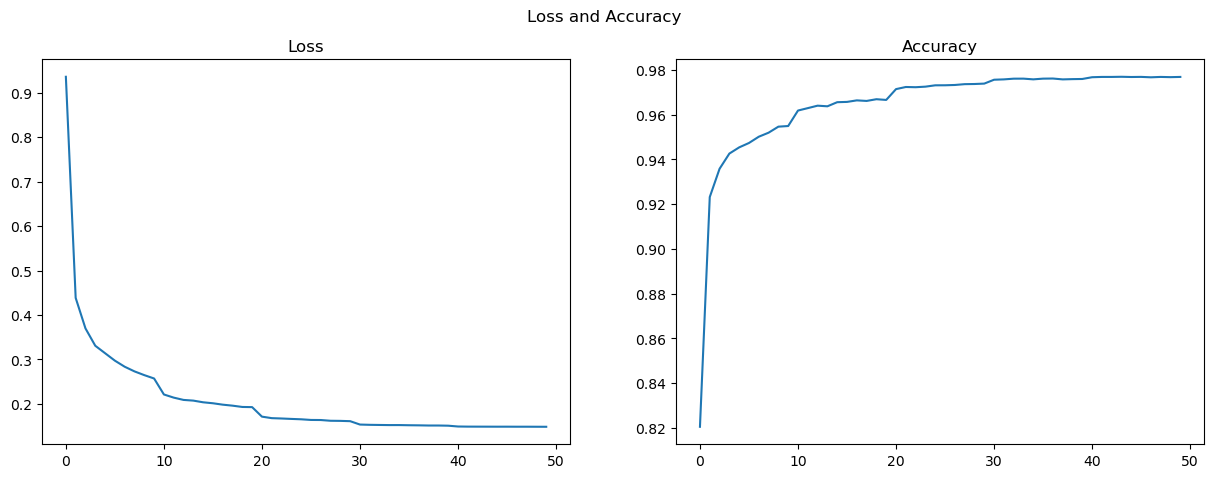

In [281]:
import matplotlib.pyplot as plt

#Plot the loss and accuracy curves for the training process 
#Show it next to each other in the same figure

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Loss and Accuracy')
ax1.plot(losses)
ax1.set_title('Loss')
ax2.plot(accuracies)
ax2.set_title('Accuracy')
plt.show()



## 2. Second Neural Architecture

In this one there are few updates:

- Its builded as 4 hidden layer as their inputs 128,56,18,18

- Activation function as 'sigmoid' 
- Dropout applied as 0.15
- Epoch applied as 100 times 
- Mini batch size as 128 
- Learning rate is initilized as 1 
- decay rate is 0.1 to decrease learning rate in steps in 10 (decay_step)

In [282]:
nn2 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,56,16,16], output_size=10, activation_function='sigmoid',dropout=0.4)

Weights in layer : 0, Weights shape: (128, 784), Biases shape: (128, 1)
Weights in layer : 1, Weights shape: (56, 128), Biases shape: (56, 1)
Weights in layer : 2, Weights shape: (16, 56), Biases shape: (16, 1)
Weights in layer : 3, Weights shape: (16, 16), Biases shape: (16, 1)
Weights in layer : 4, Weights shape: (10, 16), Biases shape: (10, 1)


In [283]:
losses,accuracies = nn2.train(X_train, y_train, learning_rate=1, epochs=100, batch_size=128,decay_rate=0.01,decay_step=10)

The learning rate at epoch 0 is :1.0
In  epoch  0 loss  is : 3.26359 and accuracy is: 0.10610
In  epoch  1 loss  is : 3.25145 and accuracy is: 0.10957
In  epoch  2 loss  is : 3.24909 and accuracy is: 0.11297
In  epoch  3 loss  is : 3.22293 and accuracy is: 0.13517
In  epoch  4 loss  is : 3.03053 and accuracy is: 0.20317
In  epoch  5 loss  is : 2.78331 and accuracy is: 0.27098
In  epoch  6 loss  is : 2.56818 and accuracy is: 0.32853
In  epoch  7 loss  is : 2.43692 and accuracy is: 0.37058
In  epoch  8 loss  is : 2.33925 and accuracy is: 0.41018
In  epoch  9 loss  is : 2.25927 and accuracy is: 0.43723
The learning rate at epoch 10 is :0.9090909090909091
In  epoch  10 loss  is : 2.18268 and accuracy is: 0.46497
In  epoch  11 loss  is : 2.12606 and accuracy is: 0.48940
In  epoch  12 loss  is : 2.07209 and accuracy is: 0.50508
In  epoch  13 loss  is : 2.02870 and accuracy is: 0.52120
In  epoch  14 loss  is : 1.99273 and accuracy is: 0.53718
In  epoch  15 loss  is : 1.95129 and accuracy is: 

In [284]:
# Test the neural network
loss,acc = nn2.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')


Test Loss: 1.3804882353755743, Test Accuracy: 0.7511


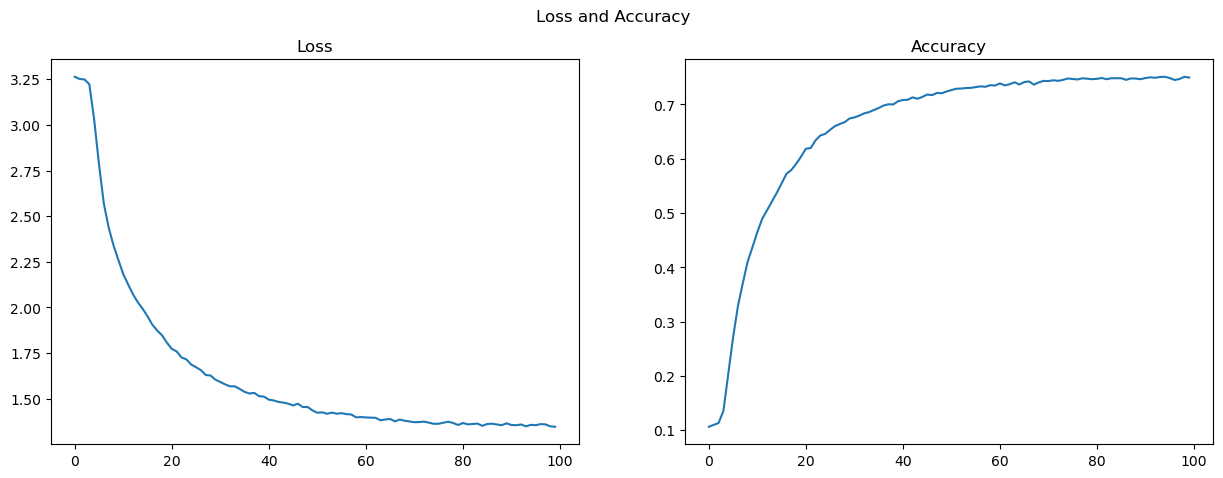

In [285]:

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Loss and Accuracy')
ax1.plot(losses)
ax1.set_title('Loss')
ax2.plot(accuracies)
ax2.set_title('Accuracy')
plt.show()


## 3.Third Neural Network Architecture

- Its builded as 4 hidden layer as their inputs 128,56,18,18

- Activation function as 'ReLu' 
- Dropout applied as 0.4
- Epoch applied as 20 times
- SGD optimizer applied 
- Mini batch size as 56 
- Learning rate is initilized as 1 
- decay rate is 0.5 to decrease learning rate in steps in 20 (decay_step)



In [286]:
nn3 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,56,16,16], output_size=10, activation_function='relu',dropout=0.4)

Weights in layer : 0, Weights shape: (128, 784), Biases shape: (128, 1)
Weights in layer : 1, Weights shape: (56, 128), Biases shape: (56, 1)
Weights in layer : 2, Weights shape: (16, 56), Biases shape: (16, 1)
Weights in layer : 3, Weights shape: (16, 16), Biases shape: (16, 1)
Weights in layer : 4, Weights shape: (10, 16), Biases shape: (10, 1)


In [287]:
losses,accuracies = nn2.train(X_train, y_train, learning_rate=1, epochs=20, batch_size=1,decay_rate=0.01,decay_step=10)

The learning rate at epoch 0 is :1.0


In  epoch  0 loss  is : 3.16255 and accuracy is: 0.20013
In  epoch  1 loss  is : 3.08320 and accuracy is: 0.24003
In  epoch  2 loss  is : 3.14836 and accuracy is: 0.21573
In  epoch  3 loss  is : 3.22355 and accuracy is: 0.19650
In  epoch  4 loss  is : 3.20443 and accuracy is: 0.20707
In  epoch  5 loss  is : 3.20764 and accuracy is: 0.20290
In  epoch  6 loss  is : 3.28409 and accuracy is: 0.17325
In  epoch  7 loss  is : 3.23348 and accuracy is: 0.17297
In  epoch  8 loss  is : 3.20047 and accuracy is: 0.18780
In  epoch  9 loss  is : 3.21238 and accuracy is: 0.18012
The learning rate at epoch 10 is :0.9090909090909091
In  epoch  10 loss  is : 3.16956 and accuracy is: 0.18062
In  epoch  11 loss  is : 3.15449 and accuracy is: 0.18380
In  epoch  12 loss  is : 3.18340 and accuracy is: 0.17687
In  epoch  13 loss  is : 3.17654 and accuracy is: 0.17990
In  epoch  14 loss  is : 3.17213 and accuracy is: 0.17862
In  epoch  15 loss  is : 3.15691 and accuracy is: 0.18292
In  epoch  16 loss  is : 3.15

In [288]:
# Test the neural network
loss,acc = nn3.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')

Test Loss: 25.623426930968062, Test Accuracy: 0.113


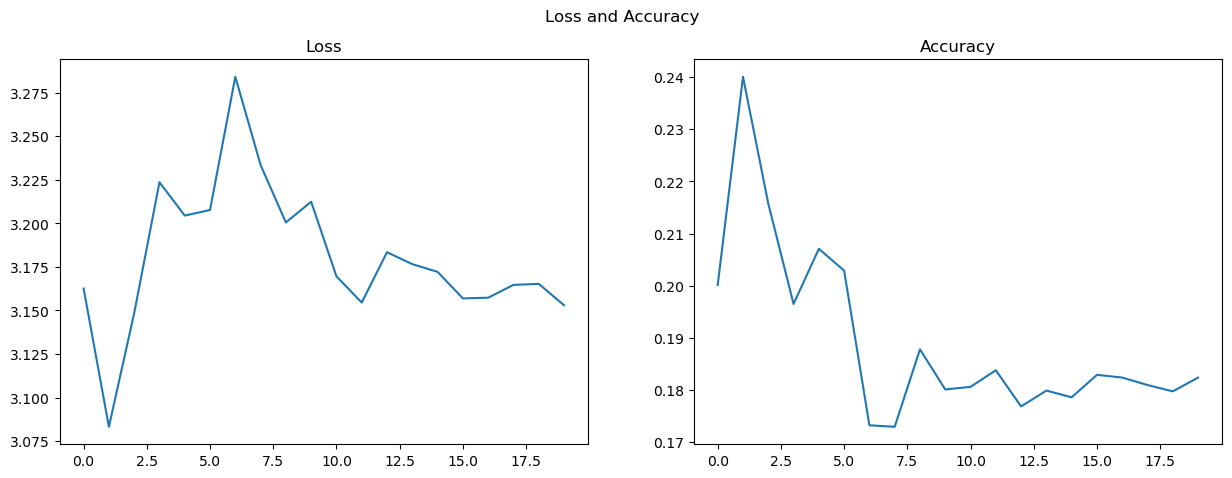

In [289]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Loss and Accuracy')
ax1.plot(losses)
ax1.set_title('Loss')
ax2.plot(accuracies)
ax2.set_title('Accuracy')
plt.show()


# Task 2 

This task mostly taken from my Invidivual work on "INM701 Introduction to Artificial Intelligence "

## Install necesarry libraries

In [290]:
# This is a library for image reshaping
!pip install Pillow 

!pip install keras 
!pip install tensorflow -- quiet


#Import neccesary libraries
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from PIL import Image
import os



#Import the neccesary libraries for the model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization,MaxPool2D
from keras.optimizers.legacy import Adam

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers


ERROR: Could not find a version that satisfies the requirement quiet (from versions: none)
ERROR: No matching distribution found for quiet


## A. Present the dataset and the topic of your study

- Dataset contains 7 different Skin cancer type as images and their labels contains in the GroundTruth.csv and corresponding images

- Topic of this study is clasify different type of skin cancer based on given image with the help of Convolutional Neural Network ( CNN)

In [291]:
#Read the csv file in Task2 folder as Ground Truth 

df = pd.read_csv('Task2/GroundTruth.csv')

#Merge the image names with their labels
df["image"] = df["image"].apply(lambda x: x + '.jpg')




#Read the test csv file in Task2 folder as Ground Truth
df_test = pd.read_csv('Task2/Test_GroundTruth.csv')

#Merge the image names with their labels
df_test["image"] = df_test["image"].apply(lambda x: x + '.jpg')

#df_test.head(5)

df.head(5)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [292]:
df_test.head(5)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0034524.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0034525.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0034526.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,ISIC_0034527.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0034528.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [293]:
#Print the shape of train and test data
print(f'The train dataset is:{df.shape}, and the test dataset is:{df_test.shape}')


The train dataset is:(10015, 8), and the test dataset is:(1512, 8)


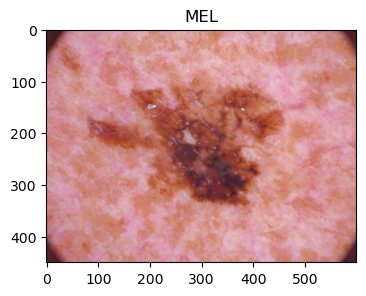

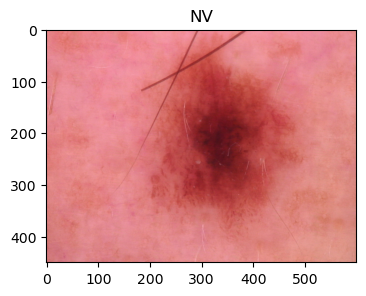

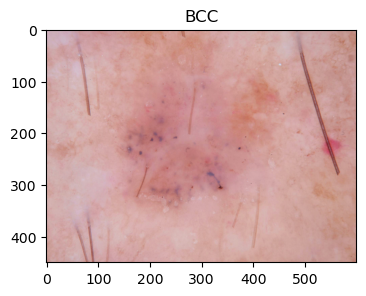

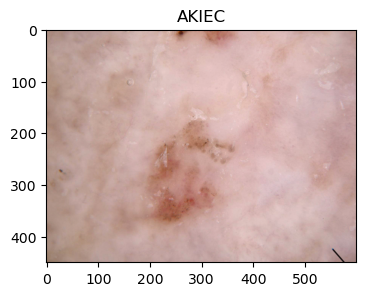

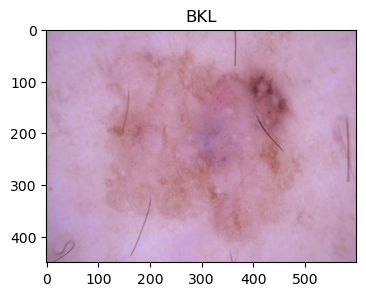

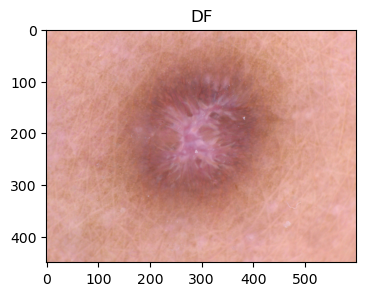

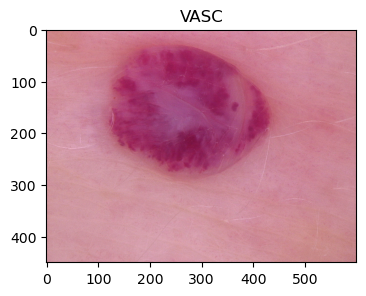

In [294]:
#Get the cancer types from the columns
cancer_types = df.columns[1:]

#Shows the every cancer type for once with their corresponding image
for cancer_type in cancer_types:

    rows= df[df[cancer_type]== 1.0] # Get the rows that has the cancer type
    rows = rows.iloc[0]             # Get the first row of the rows (name of the image)
    #print(rows)
    #print(rows['image'])
    img_path = os.path.join('Task2/images/images/',rows['image'])
    img = Image.open(img_path)
    plt.figure(figsize=(4,16))
    plt.imshow(img)
    plt.title(cancer_type)
    plt.show()




### Data pre-processing for train dataset

In [295]:
# Resizing the images as 64,64 to feed the model
new_size = (64,64)

#Iniilaizde the list to store the images

X_train = []
y_train = []

#Iterate over the images in the train dataset


for _, row in df.iterrows(): # Loop through each image in the train dataset
    img_path = os.path.join('Task2/images/images/',row['image'])

    #Open the image and resize it
    img = Image.open(img_path).resize(new_size)

    #Conver the image to a numpy array and normalize it 
    img = np.array(img) / 255.0

    #Get the cancer type for this image
    cancer_type = row[df.columns[1:]].astype(int).idxmax()
    #Append the image to the training data
    X_train.append(img)
    y_train.append(cancer_type)

#Convert the list to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)





    

In [296]:
print(X_train.shape)
print(y_train.shape)

(10015, 64, 64, 3)
(10015,)


### Data pre-processing for test dataset

In [297]:
X_test = []
y_test = []

#Iterate over the images in the test dataset

for _, row in df_test.iterrows(): # Loop through each image in the test dataset
    img_path = os.path.join('Task2/images/images_test/',row['image'])



    # Check if the file exists
    if not os.path.isfile(img_path):
        print(f"File {img_path} does not exist. Skipping.")
        continue

    #Open the image and resize it
    img = Image.open(img_path).resize(new_size)
    #Convert the image to a numpy array and normalize it 
    img = np.array(img) / 255.0

    #Get the cancer type of the image
    
    cancer_type = row[df_test.columns[1:]].astype(int).idxmax()
    #Append the image to the training data
    X_test.append(img)
    y_test.append(cancer_type)
    
X_test = np.array(X_test)
y_test = np.array(y_test)



File Task2/images/images_test/ISIC_0035068.jpg does not exist. Skipping.


In [298]:
#Print the shape of train and test data
print(f'The X train dataset is:{X_train.shape}, and the Y train dataset is:{y_train.shape}')
print(f'The X test  dataset is:{X_test.shape}, and the Y test dataset is:{y_test.shape}')

The X train dataset is:(10015, 64, 64, 3), and the Y train dataset is:(10015,)
The X test  dataset is:(1511, 64, 64, 3), and the Y test dataset is:(1511,)


In [299]:
#One hot encode the labels
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

#Print the shape of train and test data
print(f'The X train dataset is:{X_train.shape}, and the Y train dataset is:{y_train.shape}')

#Print the shape of  test data
print(f'The X test  dataset is:{X_test.shape}, and the Y test dataset is:{y_test.shape}')



The X train dataset is:(10015, 64, 64, 3), and the Y train dataset is:(10015, 7)
The X test  dataset is:(1511, 64, 64, 3), and the Y test dataset is:(1511, 7)


In [300]:
y_test[10]

array([0, 0, 0, 0, 0, 1, 0])

In [301]:
y_test[3]

array([0, 0, 0, 0, 0, 1, 0])

# B. Describe and implement a base model

Our model would be Convolutional Neural Network(CNN) since we are planning to image classificaiton.

We will use predefined library from sklearn as Sequential()

In [302]:
model = Sequential()

#Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid',strides= 1 , input_shape=(64,64,3)))
#Maxpooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

#Add the second convolutional layer
model.add(Conv2D(128, (3, 3), activation='sigmoid'))
model.add(MaxPool2D(pool_size=(3, 3)))

#Last layer is fully connected layer
model.add(Flatten())

#Add the output layer
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_59 (Conv2D)          (None, 29, 29, 128)       36992     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 9, 9, 128)         0         
 ng2D)                                                           
                                                                 
 flatten_21 (Flatten)        (None, 10368)             0         
                                                                 
 dense_24 (Dense)            (None, 7)               

In [303]:
#Compile the model with categorical cross entropy and accuracy metrics
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

#Fit the model
history = model.fit(X_train, y_train, batch_size=64, epochs=20)


Epoch 1/20
157/157 [==============================] - 7s 46ms/step - loss: 1.4148 - accuracy: 0.6539
Epoch 2/20
157/157 [==============================] - 7s 46ms/step - loss: 1.0904 - accuracy: 0.6694
Epoch 3/20
157/157 [==============================] - 7s 46ms/step - loss: 1.0402 - accuracy: 0.6688
Epoch 4/20
157/157 [==============================] - 7s 45ms/step - loss: 1.0060 - accuracy: 0.6686
Epoch 5/20
157/157 [==============================] - 7s 46ms/step - loss: 0.9882 - accuracy: 0.6692
Epoch 6/20
157/157 [==============================] - 7s 46ms/step - loss: 0.9741 - accuracy: 0.6684
Epoch 7/20
157/157 [==============================] - 7s 46ms/step - loss: 0.9627 - accuracy: 0.6685
Epoch 8/20
157/157 [==============================] - 7s 46ms/step - loss: 0.9501 - accuracy: 0.6712
Epoch 9/20
157/157 [==============================] - 7s 46ms/step - loss: 0.9370 - accuracy: 0.6711
Epoch 10/20
157/157 [==============================] - 7s 46ms/step - loss: 0.9200 - accura

In [304]:
#Print the accuracy and loss of the model
loss,acc = model.evaluate(X_test, y_test)

print('In Base version, test loss:', score[0])
print('In Base version test accuracy:', score[1])

48/48 [==============================] - 0s 7ms/step - loss: 1.0935 - accuracy: 0.6254
In Base version, test loss: 1.3201282024383545
In Base version test accuracy: 0.6009265184402466


# C. Implement at least one improvement

Previous CNN was basic, we can implement more complex architecture with dropout between layers.



In [305]:
model2 = Sequential()

#Add the first convolutional layer
model2.add(Conv2D(32, (3, 3), activation='relu',strides= 1 , input_shape=(64,64,3)))
#Maxpooling layer
model2.add(MaxPool2D(pool_size=(2, 2)))


#Add the second convolutional layer
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPool2D(pool_size=(3, 3)))

#Add the third convolutional layer
model2.add(Conv2D(16, (3, 3), activation='relu'))

#Last layer is fully connected layer
model2.add(Flatten())


#Add the output layer
model2.add(Dense(7, activation='softmax'))

model2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_61 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 9, 9, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_62 (Conv2D)          (None, 7, 7, 16)          9232      
                                                                 
 flatten_22 (Flatten)        (None, 784)             

In [306]:
#Complie the model with cross-entropy loss function and adam optimizer
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Fit the model
history = model2.fit(X_train, y_train, batch_size=64, epochs=20)

Epoch 1/20
157/157 [==============================] - 6s 34ms/step - loss: 1.0377 - accuracy: 0.6663
Epoch 2/20
157/157 [==============================] - 5s 34ms/step - loss: 0.9205 - accuracy: 0.6711
Epoch 3/20
157/157 [==============================] - 5s 34ms/step - loss: 0.8632 - accuracy: 0.6884
Epoch 4/20
157/157 [==============================] - 5s 35ms/step - loss: 0.8148 - accuracy: 0.7000
Epoch 5/20
157/157 [==============================] - 5s 35ms/step - loss: 0.7818 - accuracy: 0.7112
Epoch 6/20
157/157 [==============================] - 5s 35ms/step - loss: 0.7531 - accuracy: 0.7238
Epoch 7/20
157/157 [==============================] - 5s 35ms/step - loss: 0.7336 - accuracy: 0.7273
Epoch 8/20
157/157 [==============================] - 6s 35ms/step - loss: 0.7192 - accuracy: 0.7343
Epoch 9/20
157/157 [==============================] - 5s 35ms/step - loss: 0.7024 - accuracy: 0.7433
Epoch 10/20
157/157 [==============================] - 5s 35ms/step - loss: 0.6908 - accura

In [307]:
score = model2.evaluate(X_test, y_test, verbose=0)
print('In Improved version, test loss:', score[0])
print('In Improved version, test accuracy:', score[1])

In Improved version, test loss: 0.9374613761901855
In Improved version, test accuracy: 0.6849768161773682


# D. Optimize hyperparameters

Lets include dropout and Adam optimizer

In [308]:
#Include dropouts to the model and Adam optimizer with some learning rate decay and learning rate
model3 = Sequential()

#Add the first convolutional layer
model3.add(Conv2D(32, (3, 3), activation='relu',strides= 1 , input_shape=(64,64,3)))
#Maxpooling layer
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

#Add the second convolutional layer
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPool2D(pool_size=(3, 3)))
model3.add(Dropout(0.40))

#Add the third convolutional layer
model3.add(Conv2D(16, (3, 3), activation='relu'))

#Last layer is fully connected layer
model3.add(Flatten())

#Add the output layer
model3.add(Dense(7, activation='softmax'))

model3.summary()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_64 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 9, 9, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 9, 9, 64)        

In [309]:
#Include dropouts to the model and Adam optimizer with some learning rate decay and learning rate
model3.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate=0.2, decay=0.001), metrics = ['accuracy'])

history = model3.fit(X_train, y_train, batch_size=64, epochs=20)

Epoch 1/20
157/157 [==============================] - 6s 36ms/step - loss: 66.6803 - accuracy: 0.6603
Epoch 2/20
157/157 [==============================] - 6s 36ms/step - loss: 1.1357 - accuracy: 0.6695
Epoch 3/20
157/157 [==============================] - 6s 36ms/step - loss: 1.1376 - accuracy: 0.6695
Epoch 4/20
157/157 [==============================] - 6s 36ms/step - loss: 1.1369 - accuracy: 0.6695
Epoch 5/20
157/157 [==============================] - 6s 36ms/step - loss: 1.1369 - accuracy: 0.6695
Epoch 6/20
157/157 [==============================] - 6s 36ms/step - loss: 1.1357 - accuracy: 0.6695
Epoch 7/20
157/157 [==============================] - 6s 36ms/step - loss: 1.1378 - accuracy: 0.6695
Epoch 8/20
157/157 [==============================] - 6s 36ms/step - loss: 1.1350 - accuracy: 0.6695
Epoch 9/20
157/157 [==============================] - 6s 36ms/step - loss: 1.1341 - accuracy: 0.6695
Epoch 10/20
157/157 [==============================] - 6s 36ms/step - loss: 1.1355 - accur

In [310]:
score = model3.evaluate(X_test, y_test, verbose=0)
print('In Optimized  version with dropout and adam , test loss:', score[0])
print('In Optimized version with dropout and adam , test accuracy:', score[1])

In Optimized  version with dropout and adam , test loss: 1.32140052318573
In Optimized version with dropout and adam , test accuracy: 0.6009265184402466
